<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_11_RK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#El método de Runge-Kutta



El método de Runge-Kutta de orden cuatro es un método numérico para resolver ecuaciones diferenciales ordinarias. Se basa en aproximar la solución a

\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = f(t, y)
\end{equation}

con condiciones iniciales $y(t_0)=y_0$ a:


\begin{equation}
y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{equation}

donde $h$ es el tamaño del paso y
\begin{equation}
k_1 = f(t_n, y_n)
\end{equation}
\begin{equation}
k_2 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1)
\end{equation}
\begin{equation}
k_3 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2)
\end{equation}
\begin{equation}
k_4 = f(t_n + h, y_n + hk_3)
\end{equation}
El orden de convergencia del método es cuatro, lo que significa que el error local es proporcional a $h^5$ y el error global es proporcional a $h^4$.





#Decaimiento radioactivo

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [3]:
def fun_N(ti,yi, params):
  lambd = params[0]
  f = -lambd*yi
  return f

def rk4_i(ti, yi, h, params, funcion):
  k1 = funcion(ti,yi,params)
  k2 = funcion((ti+(h/2)),(yi+(h/2)*k1),params)
  k3 = funcion((ti+(h/2)),(yi+(h/2)*k2),params)
  k4 = funcion((ti+h),(yi+(h*k3)),params)
  yi_1 = yi + ((h/6)*(k1+(2*k2)+(2*k3)+k4))
  return yi_1

def rk4_dec(t,y0,params,funcion):
  h = abs(t[1] - t[0])
  y = np.zeros(len(t))
  y[0] = y0
  for i in range(1,len(t),1):
    y[i] = rk4_i(t[i-1], y[i-1],h,params,funcion)
  return y


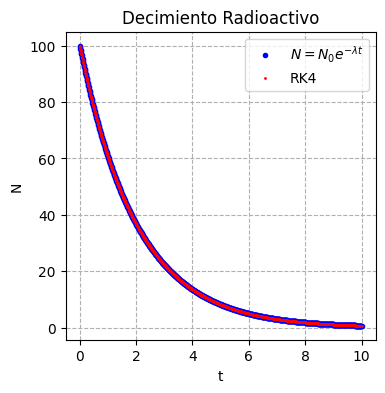

In [4]:
def condicion_inicial(t0,tf,h):
  n= abs(int((tf - t0)/h))
  t = np.linspace(t0,tf,n)
  return t

h = 0.01
t = condicion_inicial(t0 = 0,tf = 10,h = 0.01)
lambd = 0.5
params = (lambd, )
y0 = 100
y = rk4(t, y0, params, fun_N)
sol_teorica = y0*np.exp(-lambd*t)

fig,ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(t,sol_teorica, "b.",label="$N = N_0e^{-\lambda t}$")
ax.plot(t,y, "r.", ms=2,label="RK4")
ax.legend()
ax.set_xlabel("t")
ax.set_ylabel("N")
ax.set_title("Decimiento Radioactivo")
ax.grid(linestyle="--")


#Oscilador Armónico, para ecuaciones de segundo orden


\begin{equation}  
v = \frac{dx}{dt}
\end{equation}

\begin{equation}   
m \frac{d^2x}{dt^2}+kx + b\frac{dx}{dt}=0
\end{equation}

\begin{equation}   
m \frac{d^2x}{dt^2}+ b\frac{dx}{dt}+kx =0
\end{equation}

\begin{equation}   
\frac{d^2x}{dt^2}+ \frac{b}{m}\frac{dx}{dt}+ \frac{kx}{m} =0
\end{equation}

\begin{equation}  
\gamma = \frac{k}{m}
\end{equation}  

\begin{equation}  
\omega^2 = \frac{b}{m}
\end{equation}  

\begin{equation}   
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}+ \gamma \frac{\mathrm{d}x}{\mathrm{d}t}+ \omega^2x\ =0
\end{equation}

\begin{equation}  
\frac{dx}{dt}  = v
\end{equation}

\begin{equation}  
\frac{\mathrm{d}^2x}{\mathrm{d}t^2} = \frac{dv}{dt}  = -\gamma v -\omega^2x
\end{equation}

In [5]:
#Condiciones Iniciales
m = 1
k = 0
b = 20
params = (m,k,b)
y0 = 2
v0 = 0
t = np.linspace(0,10,10000)

In [6]:
def rk4_i_oscilador(ti, pos_i, h, params, funcion):
  y1, k1 = funcion(ti,pos_i,params)
  pos_i_k2 = pos_i.copy
  pos_i_k2[0] = pos_i[0] + ((h/2)*y1)
  pos_i_k2[1] = pos_i[1] + ((h/2)*k1)
  y2, k2 = funcion((ti+(h/2)),pos_i_k2,params)
  pos_i_k3 = pos_i.copy
  pos_i_k3[0] = pos_i[0] + ((h/2)*y2)
  pos_i_k3[1] = pos_i[1] + ((h/2)*k2)
  y3, k3 = funcion((ti+(h/2)),pos_i_k3,params)
  pos_i_k4 = pos_i.copy
  pos_i_k4[0] = pos_i[0] + (h*y3)
  pos_i_k4[1] = pos_i[1] + (h*k3)
  y4, k4 = funcion((ti+h),pos_i_k4,params)
  yi_1 = pos_i[0] + ((h/6)*(y1+(2*y2)+(2*y3)+y4))
  vi_1 = pos_i[1] + ((h/6)*(k1+(2*k2)+(2*k3)+k4))
  return yi_1,vi_1

def rk4_oscilador(t,y0,v0,params,funcion):
  h = abs(t[1] - t[0])
  y = np.zeros(len(t))
  v = np.zeros(len(t))
  y[0] = y0
  v[0] = v0
  pos_i = np.array([y0,v0])
  for i in range(1,len(t),1):
    y[i], v[i] = rk4_i(t[i-1],pos_i,h,params,funcion)
    pos_i = np.array([y[i],v[i]])
  return y, v

In [7]:
def fun(t, cond_ini, params):
  gamma = params[1]/params[0]
  omega_2 = params[2]/params[0]
  dydt = cond_ini[1]
  dvdt = -gamma*cond_ini[1] - omega_2*cond_ini[0]
  return np.array([dydt,dvdt])



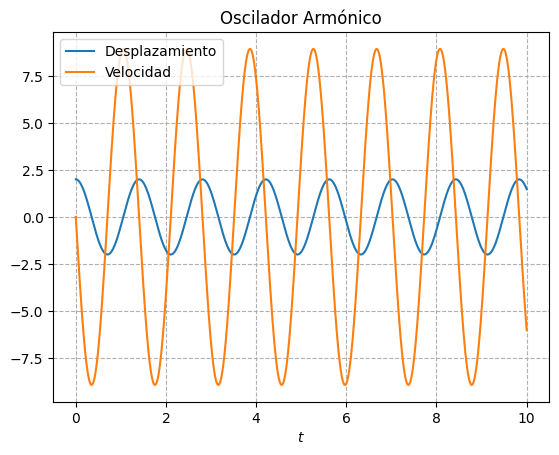

In [8]:
y,v = rk4_oscilador(t,y0,v0,params,fun)

plt.plot(t,y, label= "Desplazamiento")
plt.plot(t,v, label="Velocidad")
plt.xlabel("$t$")
plt.title("Oscilador Armónico")
plt.legend()
plt.grid(linestyle="--")



El sistema de Lorenz es:

$$
\begin{aligned}
\frac{dx}{dt} &= \sigma (y - x) \\
\frac{dy}{dt} &= x (\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z
\end{aligned}
$$


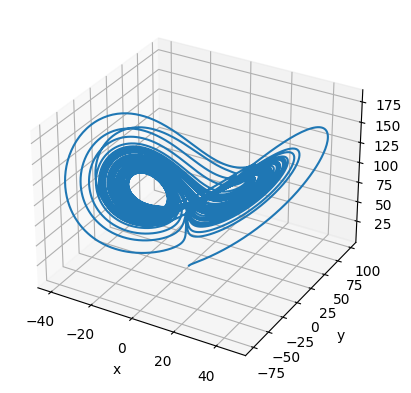

In [14]:
#Condiciones iniciales
sigma = 10
rho = 97
beta = 8./3
posI = [1, 1, 1]
N = 1000
ti = 0
tfin = 40


params=(sigma, rho, beta )
dt = h = 0.001
t = np.arange(0, 40, dt)
ti=t[0]
N=len(t)
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
x[0], y[0],z[0] = np.array(posI)

def fun(t, x,y,z, params):
  sigma = params[0]
  rho = params[1]
  beta = params[2]

  dxdt = sigma*(y-x)
  dydt = x*(rho-z)-y
  dzdt = x*y-beta*z
  return np.array([dxdt, dydt, dzdt])

for i in range(0, N-1):
  k1 = fun(ti,       x[i],            y[i], z[i], params)[0]
  k2 = fun(ti + h/2, x[i] + h/2 * k1, y[i], z[i], params)[0]
  k3 = fun(ti + h/2, x[i] + h/2 * k2, y[i], z[i], params)[0]
  k4 = fun(ti + h  , x[i] + h   * k3, y[i], z[i], params)[0]
  kmean = (1/6) * (k1 + 2*k2 + 2*k3 + k4)
  x[i+1] = x[i] + kmean*h

  q1 = fun(ti,       x[i],  y[i]           , z[i], params)[1]
  q2 = fun(ti + h/2, x[i],  y[i] + h/2 * q1, z[i], params)[1]
  q3 = fun(ti + h/2, x[i],  y[i] + h/2 * q2, z[i], params)[1]
  q4 = fun(ti + h  , x[i],  y[i] + h   * q3, z[i], params)[1]
  qmean = (1/6) * (q1 + 2*q2 + 2*q3 + q4)
  y[i+1] = y[i] + qmean*h


  c1 = fun(ti,       x[i],             y[i], z[i], params)[2]
  c2 = fun(ti + h/2, x[i],  y[i], z[i] + h/2 * c1, params)[2]
  c3 = fun(ti + h/2, x[i],  y[i], z[i] + h/2 * c2, params)[2]
  c4 = fun(ti + h  , x[i],  y[i], z[i] + h   * c3, params)[2]
  cmean = (1/6) * (c1 + 2*c2 + 2*c3 + c4)
  z[i+1] = z[i] + cmean*h

  ti=ti+dt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

# Version vectorizada del codigo

In [19]:
# @title Rk4

import numpy as np
import matplotlib.pylab as plt
def fun(t, r, params):
  sigma = params[0]
  rho = params[1]
  beta = params[2]
  dxdt = sigma*(r[1]-r[0])
  dydt = r[0]*(rho-r[2])-r[1]
  dzdt = r[0]*r[1]-beta*r[2]
  return np.array([dxdt, dydt, dzdt])


def rk4(tini,tfin, h, rini,  params):
    t = np.arange(tini, tfin, h)
    ti=t[0]
    N = len(t)
    r = np.zeros((N,3))
    r[0] = np.array(rini)
    for i in range(0, N-1):
      k1 = fun(ti,r[i], params)
      k2 = fun(ti + h/2, r[i] + h/2 * k1, params)
      k3 = fun(ti + h/2, r[i] + h/2 * k2, params)
      k4 = fun(ti + h  , r[i] + h   * k3, params)
      kmean = (1/6) * (k1 + 2*k2 + 2*k3 + k4)
      r[i+1] = r[i] + kmean*h
      ti=ti+h
    return r

def graph(r):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.plot(r[:,0], r[:,1], r[:,2])
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.set_zlabel("z")
  plt.show()

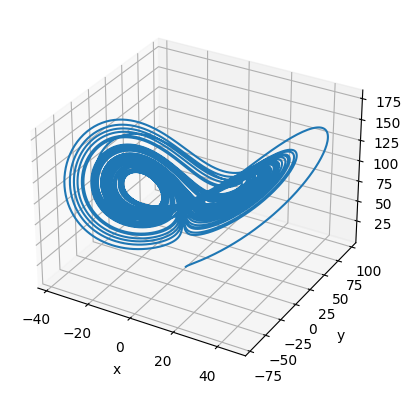

In [20]:
#@ title Condiciones iniciales
sigma = 10
rho = 97
beta = 8./3
posI=np.array([1,1,1])
params=(sigma, rho, beta )

r = rk4(tini = 0, tfin = 40, h = 0.001, rini=posI, params=params)
graph(r)